## 2BL

Chainsaw Riot

感謝各界寄來 [Deckert et al](http://vote.caltech.edu/sites/default/files/benford_pdf_4b97cc5b5b.pdf) 的研究。其實事前我是有讀過這文的。
此文指出，一次性使用 2BL 作為 fraud detection 是不適用的。例如某一次選舉，發現 2BL 並非 4.187 ，那就指為有選舉舞弊。(選舉武弊的意思不是假地址種票或老人院選票之類，而是人為的數錯票、廢棄選票、禁止某些人投票甚至報假數之類。) 這一點我也認同是不適用。原因是有選舉舞弊以外的因素會影響 2BL 的結果，就如 Deckert 文中所指，例如選區大小不同、選舉爭持之類。另一篇[文章](http://www-personal.umich.edu/~wmebane/mw12.pdf)亦有指出，有些相對正常的選舉行為(如 gerrymander/威迫利誘/策略投票)，都會影響 2BL 的結果。

故此，我使用的字眼是「人為斧鑿」或「人為因素」，代表正常選舉以外的行為，而 Gerrymander 、威迫利誘、種票等等亦屬人為。

我認為本次研究的數字可以證明有人為斧鑿的原因，是我並非只抽一次選舉結果進行分析，而是以所有回歸以來的選舉結果進行比較。一切「人為因素」以外會引起第二位平均數遠離 4.187 的因素(如選區人數不均)，大抵是不變的。故此可以用舊的選舉結果之 2BL 作基線比較。新的結果如果突然有轉變，那就很值得懷疑。若然更有外部的證據支持(如 2011 後出現種票的報道)，那就是 [triangulation](https://en.wikipedia.org/wiki/Triangulation_(social_science))。當然，如果你覺得這是穿鑿附會也是可以的。

當然，就算有如此結果，仍有可能是 2011 後出現人為操控以外，例如:

1. fluke (扶碌) ，純輝因為運氣令 2011 和 2015 年結果突別突出。我有想過計算 confidence intervals ，但是分析的不是隨機抽樣的樣本數字，而是整體母數，並不適合計算 sampling error 。
2. 2011 年後爭持變得更激烈 。但為何選舉會變得更激烈? 這是否人為控制的一部份?

無論如何，以下是 R 原始碼及結果

In [5]:
require(rvest)
require(plyr)
require(dplyr)
require(ggplot2)
require(stringr)

Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



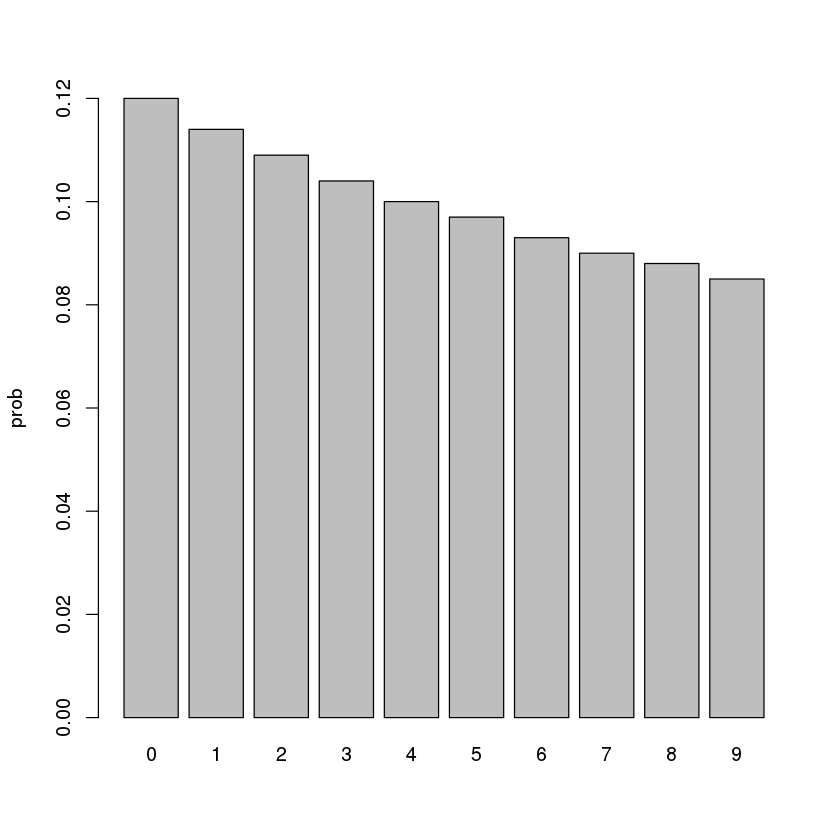

In [12]:
bl2 <- c(0.120,0.114,0.109,0.104,0.100,0.097,0.093,0.090,0.088,0.085)
barplot(bl2, ylim = c(0, 0.12), names.arg = seq(0, 9), ylab = "prob")

In [17]:
# expected value

(bl2 * seq(0,9)) %>% sum

[1] 4.186

In [6]:
## US County population

html("https://en.wikipedia.org/wiki/List_of_United_States_counties_and_county_equivalents") %>% html_nodes(xpath = "//table") %>% (function(x) { x[[2]] }) %>% html_table(fill = TRUE) -> countypop
countypop %>% tbl_df


,INCITS,County or equivalent,State or district,Pop Rank,2013 Pop,Core Based Statistical Area,Combined Statistical Area
1,1001,Autauga County,Alabama,911,"55,246","Montgomery, AL Metropolitan Statistical Area",
2,1003,Baldwin County,Alabama,329,"195,540","Daphne-Fairhope-Foley, AL Micropolitan Statistical Area","Mobile-Daphne-Fairhope, AL Combined Statistical Area"
3,1005,Barbour County,Alabama,1531,"27,076",,
4,1007,Bibb County,Alabama,1708,"22,512","Birmingham-Hoover, AL Metropolitan Statistical Area","Birmingham-Hoover-Talladega, AL Combined Statistical Area"
5,1009,Blount County,Alabama,884,"57,872","Birmingham-Hoover, AL Metropolitan Statistical Area","Birmingham-Hoover-Talladega, AL Combined Statistical Area"
6,1011,Bullock County,Alabama,2386,"10,639",,
7,1013,Butler County,Alabama,1828,"20,265",,
8,1015,Calhoun County,Alabama,522,"116,736","Anniston-Oxford-Jacksonville, AL Metropolitan Statistical Area",
9,1017,Chambers County,Alabama,1323,"34,162","Valley, AL Micropolitan Statistical Area","Columbus-Auburn-Opelika, GA-AL Combined Statistical Area"
10,1019,Cherokee County,Alabama,1555,"26,203",,


[1] 4.155633

In [7]:
# average second digit of US county pop

countypop[,5] %>% gsub(",", "", .) %>% substr(2,2) %>% Filter(function(x) x != "", .) %>% as.numeric %>% mean

[1] 4.155633

In [22]:
## DCCA

html("http://idds.census2011.gov.hk/_vti_bin/ExcelRest.aspx/Main_tables/Batch_04//A302.XLSX/Model/Ranges('A302e!A1%7CF420')") %>% html_nodes(xpath = "//table") %>% (function(x) { x[[1]] }) %>% html_table(fill = TRUE) -> dccapop

dccapop

,X1,X2,X3,X4,X5,X6,X7
1,,,,,,,
2,,"Population by District Council Constituency Area and Ethnicity, 2011 (A302)",NA,NA,NA,NA,NA
3,,District Council Constituency Area,NA,NA,Ethnicity,NA,Total
4,,Chinese,Non-Chinese,NA,NA,NA,NA
5,,Central and Western - Chung Wan,NA,NA,11 119,2 933,14 052
6,,Central and Western - Mid Levels East,NA,NA,12 970,4 675,17 645
7,,Central and Western - Castle Road,NA,NA,14 308,4 952,19 260
8,,Central and Western - Peak,NA,NA,10 571,9 860,20 431
9,,Central and Western - University,NA,NA,14 424,5 073,19 497
10,,Central and Western - Kennedy Town and Mount Davis,NA,NA,14 294,2 283,16 577


In [36]:
dccapop[5:416, 7] %>% str_trim %>% gsub(" ", "", .) %>% substr(2,2) %>% as.numeric %>% mean

[1] 4.618932

In [38]:
# extraction of 2015 data
html('http://www.elections.gov.hk/dc2015/chi/results_hk.html') %>% html_nodes(xpath="//table[@class='contents2']") %>% html_table(fill = TRUE) -> elect_res

Filter(function(x) x != "1" & x != "自動當選" & x != "*" & !is.na(x), c(elect_res[[1]][,3], elect_res[[1]][,5])) %>% gsub("[,\\*]", "", .) -> allcounts


In [39]:
allcounts

[1] "940"  "1466" "1311" "1837" "1844" "838"  "1859" "2491" "2011" "2328"
 [11] "1898" "1204" "1436" "980"  "1654" "1619" "760"  "1367" "1018" "1021"
 [21] "1398" "1098" "141"  "1350" "900"  "642"  "1463" "793"  "1268" "2674"
 [31] "2008" "955"  "211"  "2401" "1444" "107"  "1810" "1112" "2025" "3642"
 [41] "69"   "1572" "1181" "783"  "1229" "1950" "930"  "2257" "2227" "2314"
 [51] "114"  "2039" "1656" "42"   "3343" "2535" "2443" "2384" "3310" "2222"
 [61] "977"  "992"  "2470" "48"   "2396" "979"  "2026" "2241" "621"  "1936"
 [71] "226"  "1556" "1810" "3068" "119"  "1854" "21"   "2180" "643"  "2945"
 [81] "2652" "2699" "1629" "21"   "2408" "29"   "1952" "2223" "2645" "957" 
 [91] "752"  "1832" "1213" "524"  "2124" "2473" "1924" "1531" "1611" "172" 
[101] "1608" "2633" "962"  "1424" "869"  "1442" "1172" "1682" "852"  "1099"
[111] "386"  "1929" "246"  "1307" "796"  "2088" "1287" "1544" "538"  "1873"
[121] "2973" "215"  "2432" "2137" "1191" "94"   "2193" "2421" "1675" "241" 
[131] "1816" "2353" "64"   "877"  "1160" "2124" "1152" "2277" "2563" "54"  
[141] "1678" "2454" "2625" "148"  "1663" "768"  "1561" "2776" "2332" "1852"
[151] "92"   "2378" "2021" "502"  "694"  "73"   "16"   "932"  "763"  "654" 
[161] "177"  "1544" "1020" "1607" "1139" "2345" "2041" "2075" "162"  "1740"
[171] "1811" "1544" "31"   "1547" "1842" "715"  "2191" "2552" "1478" "204" 
[181] "1675" "2168" "111"  "2640" "2974" "1284" "2710" "1597" "2232" "2772"
[191] "2967" "815"  "1107" "2799" "2405" "3285" "2048" "1585" "3907" "129" 
[201] "2201" "1321" "2682" "2078" "2898" "2128" "3060" "2638" "2764" "1665"
[211] "92"   "3993" "3466" "668"  "340"  "2125" "1285" "988"  "2666" "1528"
[221] "1914" "1264" "2654" "3243" "2170" "1134" "1717" "1098" "1831" "907" 
[231] "1525" "2097" "1531" "2441" "1246" "2245" "1233" "2647" "1550" "2020"
[241] "2074" "2820" "1441" "1799" "454"  "2462" "1500" "1984" "193"  "1668"
[251] "1056" "2193" "1773" "2895" "1035" "1997" "353"  "1517" "1532" "232" 
[261] "192"  "2536" "2383" "2085" "1731" "92"   "1605" "2673" "631"  "1099"
[271] "1837" "1021" "96"   "697"  "179"  "445"  "920"  "2493" "172"  "1682"
[281] "2021" "1049" "1949" "99"   "391"  "25"   "94"   "1736" "2686" "1290"
[291] "1321" "402"  "2456" "80"   "2267" "1126" "1044" "1644" "1227" "1249"
[301] "246"  "2890" "1615" "362"  "1425" "163"  "1344" "2610" "1807" "3136"
[311] "1941" "965"  "2819" "496"  "1468" "846"  "2749" "632"  "1747" "1345"
[321] "1255" "1552" "2191" "1380" "144"  "1596" "1193" "1806" "2872" "2640"
[331] "413"  "1403" "1814" "1710" "178"  "2660" "992"  "326"  "672"  "2934"
[341] "1975" "1760" "2390" "2219" "797"  "1460" "1649" "1104" "651"  "111" 
[351] "1567" "603"  "865"  "1866" "384"  "1881" "2017" "3716" "4148" "1122"
[361] "363"  "779"  "1570" "2711" "2447" "129"  "2468" "1744" "2292" "1699"
[371] "1780" "1004" "1723" "1539" "962"  "1397" "1838" "3014" "617"  "531" 
[381] "1216" "3719" "2873" "1831" "1036" "1671" "43"   "480"  "583"  "487" 
[391] "784"  "985"  "3274" "3051" "779"  "913"  "3283" "1229" "3104" "117" 
[401] "2707" "2261" "2207" "2978" "1662" "1055" "3373" "2667" "539"  "2759"
[411] "1406" "1602" "1185" "2111" "2437" "2666" "1050" "3221" "3724" "2455"
[421] "1675" "1713" "987"  "1175" "927"  "1989" "2144" "1068" "2433" "2087"
[431] "662"  "1268" "2160" "101"  "1250" "1658" "148"  "2506" "2592" "1106"
[441] "33"   "1767" "2730" "1121" "888"  "1612" "1176" "2071" "3740" "2647"
[451] "2629" "2352" "1151" "2034" "1828" "1553" "1139" "1833" "677"  "3212"
[461] "2217" "1369" "1617" "2320" "2853" "1831" "3141" "1459" "1997" "1624"
[471] "707"  "2130" "580"  "1230" "2701" "2146" "2667" "655"  "54"   "2419"
[481] "578"  "1273" "2345" "3214" "1838" "2814" "168"  "2283" "282"  "2648"
[491] "1467" "554"  "653"  "727"  "486"  "3061" "2469" "1897" "2161" "1176"
[501] "113"  "838"  "1487" "480"  "1090" "1521" "1457" "317"  "1455" "1072"
[511] "1569" "1898" "2397" "1336" "1790" "1344" "1352" "1621" "1878" "1590"
[521] "915"  "723"  "2236" "1148" "1479" "939"  "1

In [40]:
substr(allcounts, 2, 2) %>% as.numeric %>% mean

[1] 4.356401

In [41]:
## extraction of 2011 data

html('http://www.elections.gov.hk/dc2011/chi/results_hk.html') %>% html_nodes(xpath="//table[@class='contents2']") %>% html_table(fill = TRUE) -> elect_res2011
Filter(function(x) x != "1" & x != "自動當選" & x != "*" & !is.na(x), c(elect_res2011[[1]][-1,3], elect_res2011[[1]][-1,5])) %>% gsub("[,\\*]", "", .) -> allcounts2011



In [42]:
allcounts2011

[1] "951"  "96"   "108"  "927"  "1291" "1505" "530"  "1468" "973"  "1655"
 [11] "201"  "1935" "1871" "1875" "711"  "910"  "1450" "125"  "1168" "1739"
 [21] "1353" "463"  "1625" "1552" "80"   "1350" "1266" "141"  "965"  "264" 
 [31] "626"  "742"  "748"  "524"  "1604" "610"  "2529" "1625" "1932" "1107"
 [41] "887"  "1200" "1925" "2336" "508"  "2140" "1905" "1268" "1079" "1030"
 [51] "360"  "1750" "174"  "1841" "2050" "1295" "490"  "1188" "1775" "75"  
 [61] "1099" "1475" "1167" "898"  "1871" "1916" "1088" "323"  "1925" "455" 
 [71] "1527" "129"  "2029" "1995" "2346" "2275" "182"  "1894" "42"   "2460"
 [81] "69"   "1723" "2234" "1445" "3001" "1752" "309"  "1689" "410"  "137" 
 [91] "85"   "1504" "333"  "447"  "2242" "2401" "2273" "137"  "1012" "886" 
[101] "784"  "1281" "1543" "254"  "485"  "66"   "610"  "413"  "1076" "905" 
[111] "1537" "214"  "22"   "1110" "1610" "1043" "165"  "1045" "178"  "1037"
[121] "492"  "278"  "251"  "1048" "883"  "1133" "1485" "1729" "782"  "531" 
[131] "1569" "1629" "191"  "2235" "239"  "75"   "2015" "2183" "3507" "159" 
[141] "1908" "476"  "1812" "2204" "174"  "1312" "334"  "985"  "1947" "3403"
[151] "1108" "2436" "2888" "1451" "2291" "2098" "687"  "644"  "1773" "114" 
[161] "1416" "486"  "1368" "1629" "1632" "1583" "604"  "437"  "636"  "625" 
[171] "190"  "2613" "322"  "1296" "855"  "1513" "371"  "958"  "640"  "858" 
[181] "1360" "256"  "2650" "2821" "1643" "70"   "2870" "1039" "441"  "309" 
[191] "1322" "1898" "2498" "2862" "2809" "1275" "502"  "1878" "1601" "1501"
[201] "1573" "2754" "1660" "2596" "1131" "968"  "1533" "2025" "1088" "1554"
[211] "1819" "1712" "2802" "1751" "1033" "662"  "2567" "2759" "259"  "426" 
[221] "2234" "2934" "3210" "3201" "380"  "1921" "500"  "3308" "2019" "760" 
[231] "348"  "667"  "144"  "1823" "658"  "941"  "59"   "3229" "1296" "3067"
[241] "751"  "2132" "1715" "402"  "1819" "1638" "1739" "2423" "639"  "703" 
[251] "1028" "2209" "2072" "2511" "2256" "1657" "549"  "1045" "845"  "210" 
[261] "1054" "2481" "2761" "77"   "1548" "1768" "257"  "590"  "899"  "458" 
[271] "314"  "648"  "2876" "1742" "2639" "300"  "1149" "811"  "1175" "2373"
[281] "1040" "1323" "1416" "1447" "1140" "1016" "543"  "408"  "1189" "1174"
[291] "1342" "1934" "1876" "1477" "871"  "666"  "2533" "1443" "2306" "104" 
[301] "1971" "124"  "1089" "1587" "151"  "711"  "249"  "2771" "800"  "1178"
[311] "1004" "1302" "1912" "1845" "3231" "2187" "1921" "1698" "1021" "1349"
[321] "1911" "1838" "1735" "987"  "2274" "190"  "1443" "613"  "2459" "745" 
[331] "391"  "1032" "349"  "1865" "283"  "1439" "2747" "1512" "1224" "1365"
[341] "326"  "2508" "3062" "1956" "1517" "4791" "1568" "2293" "315"  "535" 
[351] "639"  "349"  "1673" "1210" "1564" "506"  "1896" "1540" "996"  "1773"
[361] "1006" "1241" "1163" "1779" "1172" "815"  "634"  "1746" "2020" "3864"
[371] "1458" "2881" "1311" "2129" "662"  "1678" "1196" "688"  "1269" "186" 
[381] "1696" "1362" "144"  "710"  "935"  "934"  "1148" "136"  "3096" "125" 
[391] "2467" "2197" "522"  "1836" "812"  "1742" "3133" "872"  "1728" "266" 
[401] "3014" "2687" "2260" "1244" "41"   "1545" "1004" "650"  "348"  "265" 
[411] "334"  "192"  "2493" "1212" "169"  "2885" "1978" "1382" "3060" "448" 
[421] "2455" "844"  "1504" "2296" "1513" "2317" "1153" "2612" "1873" "521" 
[431] "1801" "3302" "1058" "1950" "317"  "522"  "295"  "1721" "2104" "1730"
[441] "2180" "2680" "982"  "1621" "3039" "231"  "3573" "457"  "1499" "2044"
[451] "766"  "885"  "2186" "629"  "1808" "1944" "1894" "632"  "1015" "1752"
[461] "843"  "1150" "191"  "1700" "1838" "2629" "2960" "1291" "86"   "1488"
[471] "166"  "387"  "1582" "1923" "1118" "2026" "1379" "1395" "2404" "1398"
[481] "2548" "2616" "611"  "2405" "97"   "308"  "1569" "2101" "1817" "756" 
[491] "1693" "818"  "1177" "1029" "708"  "1177" "865"  "391"  "92"   "1320"
[501] "34"   "376"  "516"  "800"  "1432" "881"  "820"  "2169" "1721" "2723"
[511] "1631" "1968" "705"  "189"  "270"  "907"  "1199" "1241" "187"  "730" 
[521] "369"  "43"   "992"  "1262" "1422" "1068" "3

In [43]:
substr(allcounts, 2, 2) %>% as.numeric %>% mean

[1] 4.356401

In [44]:
## extraction of 2007 data

html('http://www.elections.gov.hk/dc2007/chi/results_hk.html') %>% html_nodes(xpath="//td[@class='contents']") %>% html_nodes("table") %>% html_table(fill = TRUE) -> elect_res2007

Filter(function(x) x != "1" & x != "自動當選" & x != "*" & !is.na(x), c(elect_res2007[[1]][2:nrow(elect_res[[1]]),3], elect_res2007[[1]][2:nrow(elect_res[[1]]), 5])) %>% gsub("[,\\*]", "", .) -> allcounts2007


In [46]:
allcounts2007

[1] "1107" "1370" "1388" "186"  "795"  "802"  "1420" "1269" "1417" "2702"
 [11] "162"  "2135" "79"   "756"  "1850" "791"  "690"  "1085" "1407" "777" 
 [21] "264"  "155"  "1391" "888"  "834"  "947"  "755"  "604"  "238"  "720" 
 [31] "567"  "1080" "577"  "414"  "943"  "618"  "920"  "2184" "364"  "1291"
 [41] "669"  "2430" "284"  "654"  "1505" "2188" "2092" "1251" "2308" "2074"
 [51] "1231" "1650" "2120" "1385" "1382" "1199" "1698" "286"  "595"  "2069"
 [61] "1591" "1313" "1409" "1450" "1165" "1828" "1491" "712"  "2286" "1454"
 [71] "763"  "719"  "696"  "560"  "671"  "1752" "1535" "1505" "1301" "1419"
 [81] "2077" "2161" "1046" "605"  "1415" "1127" "2576" "2073" "1277" "448" 
 [91] "1368" "1677" "139"  "586"  "920"  "76"   "1115" "510"  "402"  "1328"
[101] "1882" "1402" "2077" "1768" "1434" "1200" "480"  "1296" "1103" "790" 
[111] "386"  "527"  "787"  "177"  "609"  "687"  "48"   "547"  "84"   "56"  
[121] "960"  "1238" "898"  "624"  "1908" "285"  "1197" "1514" "1955" "2115"
[131] "1736" "2366" "1136" "1493" "517"  "851"  "205"  "657"  "3074" "2243"
[141] "1031" "2243" "1845" "1720" "1512" "1101" "730"  "1722" "2200" "2666"
[151] "1680" "990"  "1449" "539"  "357"  "1103" "2050" "623"  "531"  "1989"
[161] "326"  "826"  "1106" "1726" "1716" "1537" "303"  "71"   "1237" "2086"
[171] "1817" "2320" "2277" "1983" "2595" "1175" "572"  "987"  "855"  "2654"
[181] "2444" "1895" "555"  "1200" "1768" "2456" "1851" "2646" "3131" "1329"
[191] "3069" "1344" "1339" "1420" "93"   "1589" "1179" "781"  "2599" "265" 
[201] "554"  "2362" "114"  "60"   "2647" "1499" "2715" "1220" "847"  "3905"
[211] "1657" "1452" "2330" "1822" "1317" "1695" "2622" "1113" "1164" "1926"
[221] "1199" "3569" "887"  "359"  "305"  "541"  "2455" "1833" "664"  "864" 
[231] "2133" "515"  "1352" "875"  "2221" "1048" "194"  "1097" "2124" "1777"
[241] "23"   "1039" "73"   "603"  "1920" "2508" "894"  "542"  "597"  "925" 
[251] "2303" "811"  "594"  "2330" "2638" "1463" "164"  "1093" "200"  "75"  
[261] "800"  "2690" "896"  "2226" "2181" "1165" "893"  "2252" "2668" "1398"
[271] "889"  "1695" "1248" "535"  "1565" "1558" "496"  "2097" "1007" "988" 
[281] "1164" "1284" "2416" "340"  "475"  "2587" "1994" "818"  "2188" "554" 
[291] "158"  "1851" "1359" "1953" "2298" "1960" "1132" "892"  "361"  "1325"
[301] "2318" "2582" "1502" "1865" "1766" "1611" "754"  "2096" "1164" "543" 
[311] "1000" "847"  "1860" "790"  "1489" "174"  "193"  "43"   "540"  "1321"
[321] "642"  "2403" "2600" "2009" "473"  "902"  "585"  "163"  "1769" "1382"
[331] "1643" "1530" "207"  "227"  "665"  "2526" "2151" "1739" "123"  "1882"
[341] "1776" "30"   "1239" "1980" "405"  "1296" "25"   "2309" "115"  "1081"
[351] "1534" "877"  "1614" "1114" "1355" "2439" "597"  "531"  "813"  "154" 
[361] "2088" "1351" "1503" "1510" "141"  "1948" "1736" "2053" "2837" "2215"
[371] "139"  "1368" "64"   "2578" "795"  "1946" "825"  "1604" "2516" "1444"
[381] "139"  "874"  "565"  "1487" "1922" "2025" "969"  "852"  "478"  "724" 
[391] "292"  "98"   "1810" "2937" "1652" "108"  "1032" "649"  "1717" "168" 
[401] "1224" "988"  "2593" "1043" "910"  "753"  "2201" "1130" "40"   "1101"
[411] "1555" "45"   "1604" "2264" "1307" "1284" "995"  "1472" "326"  "1053"
[421] "2171" "2258" "1649" "2080" "720"  "827"  "1587" "779"  "2768" "1082"
[431] "1259" "2128" "1160" "1346" "495"  "1889" "1680" "1614" "817"  "1922"
[441] "3480" "1522" "2533" "3084" "1834" "2177" "633"  "252"  "1877" "609" 
[451] "1426" "1011" "768"  "1192" "392"  "2464" "821"  "1410" "3062" "2014"
[461] "2445" "1776" "1151" "3858" "304"  "277"  "885"  "1973" "1451" "1716"
[471] "288"  "1187" "809"  "1040" "422"  "2525" "701"  "1254" "1893" "1563"
[481] "3477" "640"  "1115" "1377" "2147" "2222" "1510" "133"  "887"  "69"  
[491] "50"   "466"  "554"  "1985" "853"  "880"  "984"  "1327" "247"  "802" 
[501] "64"   "167"  "689"  "1097" "543"  "679"  "366"  "203"  "315"  "1835"
[511] "1892" "1168" "1783" "1033" "2013" "240"  "1463" "454"  "1039" "709" 
[521] "1059" "607"  "442"  "1309" "696"  "156"  "1

In [47]:
substr(allcounts2007, 2, 2) %>% as.numeric %>% mean

[1] 4.114451

In [48]:
## extraction of 2003 data. NB: Source is wikipedia, not hkgov

html("https://zh.wikipedia.org/zh-hk/2003%E5%B9%B4%E9%A6%99%E6%B8%AF%E5%8D%80%E8%AD%B0%E6%9C%83%E9%81%B8%E8%88%89%E7%B5%90%E6%9E%9C") %>% html_nodes(xpath = "//table[@class='wikitable']") %>% html_table(fill = TRUE) -> raw2003tables


Filter(function(x) str_detect(x, "^[0-9,]+$"), unlist(llply(raw2003tables, function(x) { c(x[,2], x[,4]) }))) %>% gsub("[,\\*]", "", .) -> allcounts2003
    

In [49]:
allcounts2003

[1] "1481" "1624" "584"  "569"  "1234" "1805" "1497" "1937" "1676" "1529"
 [11] "729"  "1348" "1693" "124"  "1254" "650"  "1186" "1625" "672"  "1241"
 [21] "1869" "841"  "1146" "1744" "1756" "448"  "750"  "1327" "1064" "79"  
 [31] "985"  "1117" "1190" "1466" "611"  "991"  "338"  "262"  "911"  "1048"
 [41] "699"  "1248" "952"  "974"  "830"  "1219" "1236" "776"  "590"  "1189"
 [51] "2145" "871"  "2211" "2553" "1827" "996"  "448"  "874"  "2901" "1932"
 [61] "1549" "885"  "1456" "1027" "125"  "230"  "1788" "2665" "943"  "636" 
 [71] "1433" "1133" "1671" "1167" "991"  "1128" "1870" "1301" "1551" "182" 
 [81] "1184" "830"  "942"  "794"  "698"  "2830" "2584" "1421" "1684" "1519"
 [91] "1997" "1231" "1080" "1222" "1108" "1636" "1385" "678"  "1048" "944" 
[101] "1149" "2657" "1073" "2672" "1743" "1793" "2775" "1305" "2357" "1481"
[111] "353"  "2400" "1353" "2526" "1613" "442"  "1174" "1720" "707"  "1309"
[121] "1512" "1550" "2179" "1475" "1389" "600"  "1215" "766"  "1014" "320" 
[131] "1128" "1120" "1763" "1903" "2112" "1659" "1049" "1119" "1378" "962" 
[141] "141"  "1013" "609"  "721"  "931"  "1253" "1961" "1104" "834"  "573" 
[151] "1455" "379"  "356"  "1222" "878"  "580"  "1240" "925"  "1164" "1044"
[161] "992"  "785"  "1094" "989"  "1140" "386"  "1582" "2565" "332"  "298" 
[171] "1118" "896"  "194"  "643"  "707"  "782"  "148"  "1317" "537"  "495" 
[181] "778"  "42"   "481"  "514"  "1775" "3268" "1311" "2677" "437"  "1936"
[191] "959"  "692"  "294"  "2009" "677"  "836"  "699"  "1764" "532"  "2043"
[201] "1025" "402"  "1355" "1719" "1262" "1910" "548"  "1337" "705"  "1097"
[211] "1324" "928"  "1217" "1722" "2524" "2516" "1724" "522"  "1893" "1027"
[221] "965"  "1241" "1406" "160"  "113"  "2133" "2013" "781"  "544"  "520" 
[231] "471"  "1062" "190"  "90"   "715"  "1765" "523"  "684"  "1124" "1847"
[241] "1642" "843"  "1513" "689"  "619"  "698"  "1054" "60"   "2110" "1895"
[251] "2573" "1265" "1326" "1307" "2524" "794"  "1552" "1429" "1397" "1016"
[261] "1454" "1672" "1392" "1269" "1245" "1200" "919"  "890"  "585"  "2112"
[271] "1728" "1847" "3604" "1505" "227"  "748"  "927"  "2977" "141"  "278" 
[281] "2301" "1385" "1958" "3163" "1917" "2941" "2243" "3034" "425"  "2190"
[291] "528"  "1574" "2062" "1466" "1881" "1516" "761"  "1154" "1614" "1538"
[301] "2478" "482"  "1575" "2086" "2324" "2157" "1711" "3514" "499"  "1290"
[311] "2086" "2098" "1525" "4480" "1324" "1026" "1657" "2029" "113"  "30"  
[321] "1279" "567"  "1596" "2284" "2759" "3052" "2159" "292"  "1219" "1448"
[331] "2671" "3819" "1804" "2111" "948"  "1722" "900"  "1335" "1738" "2057"
[341] "1727" "337"  "1036" "2807" "1718" "157"  "1557" "1534" "504"  "2003"
[351] "1950" "129"  "275"  "1980" "332"  "2153" "2030" "2259" "1404" "2524"
[361] "1593" "2698" "1544" "2040" "1531" "2159" "1208" "2314" "1519" "3393"
[371] "480"  "1560" "1513" "2096" "1830" "2415" "1041" "508"  "2656" "1124"
[381] "1731" "628"  "1620" "1839" "2140" "2182" "783"  "1345" "1724" "412" 
[391] "362"  "597"  "541"  "452"  "1339" "629"  "637"  "1537" "1969" "922" 
[401] "1749" "1248" "847"  "1603" "1169" "1088" "2305" "955"  "915"  "1862"
[411] "1860" "1131" "1945" "1694" "871"  "1350" "2819" "1105" "2914" "1987"
[421] "2278" "1589" "2512" "1564" "754"  "743"  "594"  "3102" "1855" "334" 
[431] "154"  "1508" "2187" "2045" "793"  "480"  "1091" "1618" "228"  "191" 
[441] "2550" "916"  "2198" "2178" "202"  "140"  "487"  "2696" "1234" "854" 
[451] "324"  "1377" "2814" "1447" "2023" "635"  "1516" "2014" "964"  "469" 
[461] "1623" "2621" "1959" "2577" "507"  "1520" "2543" "729"  "1656" "1539"
[471] "489"  "1489" "2022" "1499" "1504" "854"  "509"  "1981" "994"  "911" 
[481] "676"  "1449" "443"  "1108" "1218" "521"  "415"  "313"  "1306" "700" 
[491] "781"  "809"  "1571" "579"  "715"  "877"  "2350" "1813" "146"  "1056"
[501] "1623" "1068" "1135" "1388" "2085" "1015" "648"  "1251" "1989" "921" 
[511] "1378" "840"  "1591" "643"  "516"  "398"  "1123" "750"  "183"  "2097"
[521] "1479" "2248" "1555" "1026" "1359" "1772" "1

In [50]:
substr(allcounts2003, 2, 2) %>% as.numeric %>% mean

[1] 4.083879

In [51]:
## extraction of 1999 data, also from wikipedia

html("https://zh.wikipedia.org/zh-hk/1999%E5%B9%B4%E9%A6%99%E6%B8%AF%E5%8D%80%E8%AD%B0%E6%9C%83%E9%81%B8%E8%88%89%E7%B5%90%E6%9E%9C") %>% html_nodes(xpath = "//table[@class='wikitable']") %>% html_table(fill = TRUE) -> raw1999tables

Filter(function(x) str_detect(x, "^[0-9,]+$"), unlist(llply(raw1999tables, function(x) { c(x[,2], x[,4]) }))) %>% gsub("[,\\*]", "", .) -> allcounts1999
    

In [52]:
allcounts1999

[1] "1179" "851"  "402"  "774"  "1217" "1552" "1157" "632"  "762"  "1248"
 [11] "1468" "898"  "739"  "983"  "546"  "1074" "1014" "412"  "1079" "1141"
 [21] "1262" "1309" "1243" "688"  "487"  "1063" "1096" "289"  "630"  "877" 
 [31] "883"  "285"  "318"  "766"  "1275" "783"  "801"  "398"  "1398" "683" 
 [41] "540"  "711"  "1356" "1703" "901"  "2072" "1330" "1481" "1824" "1727"
 [51] "864"  "1636" "1065" "488"  "819"  "745"  "337"  "604"  "995"  "896" 
 [61] "1677" "800"  "561"  "1392" "1075" "1404" "1940" "1479" "1323" "733" 
 [71] "1281" "997"  "1046" "1271" "1792" "2360" "806"  "638"  "1988" "878" 
 [81] "360"  "1433" "2054" "968"  "910"  "1507" "2782" "1446" "622"  "1807"
 [91] "897"  "1383" "461"  "591"  "1173" "684"  "671"  "235"  "653"  "1521"
[101] "807"  "1355" "1652" "1042" "283"  "1253" "1674" "1204" "2306" "745" 
[111] "1087" "2204" "1349" "1618" "816"  "1067" "833"  "507"  "1093" "422" 
[121] "425"  "950"  "1483" "1438" "1003" "1885" "994"  "488"  "772"  "675" 
[131] "626"  "934"  "316"  "638"  "571"  "280"  "772"  "1178" "933"  "867" 
[141] "705"  "601"  "100"  "272"  "319"  "899"  "1142" "1670" "724"  "111" 
[151] "1214" "999"  "1022" "1067" "870"  "1204" "859"  "287"  "905"  "927" 
[161] "1031" "1297" "996"  "637"  "439"  "335"  "666"  "1750" "1099" "1782"
[171] "1285" "516"  "509"  "1048" "1280" "2142" "245"  "1595" "680"  "849" 
[181] "1558" "2690" "660"  "718"  "467"  "1093" "645"  "573"  "499"  "294" 
[191] "404"  "564"  "1557" "1208" "840"  "1017" "907"  "491"  "1548" "1069"
[201] "1834" "965"  "1294" "1909" "1687" "482"  "694"  "1799" "956"  "171" 
[211] "984"  "993"  "760"  "446"  "729"  "1214" "402"  "592"  "341"  "908" 
[221] "282"  "1149" "1244" "161"  "969"  "1501" "1515" "333"  "976"  "1118"
[231] "1175" "1418" "1304" "809"  "491"  "511"  "416"  "992"  "964"  "965" 
[241] "409"  "1063" "831"  "897"  "476"  "1383" "1384" "1952" "1854" "621" 
[251] "2190" "980"  "544"  "2573" "1391" "1364" "1759" "2122" "2218" "866" 
[261] "1923" "975"  "1340" "1065" "461"  "495"  "814"  "1546" "1419" "367" 
[271] "882"  "1331" "1046" "1679" "1273" "846"  "596"  "1834" "1947" "1062"
[281] "1598" "1829" "1560" "2697" "964"  "1126" "1282" "1680" "1315" "2605"
[291] "1074" "1294" "1911" "1465" "515"  "753"  "2060" "1039" "1939" "2080"
[301] "1476" "1650" "1962" "1979" "1411" "2107" "1858" "2604" "459"  "1949"
[311] "977"  "616"  "1896" "1261" "2229" "1375" "994"  "1733" "673"  "778" 
[321] "1056" "1129" "1612" "1220" "2058" "1705" "949"  "1091" "958"  "506" 
[331] "2128" "1783" "1846" "1470" "1407" "2072" "1242" "2965" "921"  "2150"
[341] "1009" "1580" "2597" "1235" "1715" "1071" "1152" "851"  "1000" "2093"
[351] "2149" "1028" "2352" "2050" "1282" "1670" "555"  "125"  "954"  "1052"
[361] "1680" "927"  "202"  "133"  "922"  "359"  "449"  "514"  "390"  "1456"
[371] "892"  "1399" "697"  "1141" "676"  "344"  "1072" "1847" "1094" "611" 
[381] "1736" "223"  "683"  "642"  "455"  "1019" "797"  "499"  "316"  "1404"
[391] "2158" "1842" "1350" "674"  "1388" "2188" "1570" "1544" "860"  "1318"
[401] "2022" "490"  "673"  "468"  "1125" "1830" "1405" "1518" "793"  "879" 
[411] "1421" "954"  "1124" "2635" "2279" "773"  "1354" "623"  "896"  "988" 
[421] "1183" "895"  "2043" "1816" "981"  "1448" "1251" "1069" "856"  "858" 
[431] "434"  "2458" "1255" "671"  "2930" "1656" "812"  "1090" "2249" "679" 
[441] "468"  "957"  "248"  "1397" "853"  "1483" "749"  "2228" "667"  "826" 
[451] "1769" "140"  "1199" "315"  "484"  "806"  "726"  "408"  "1285" "1422"
[461] "875"  "946"  "1389" "134"  "1122" "2129" "1013" "1693" "1899" "55"  
[471] "1423" "1293" "2793" "2601" "1072" "587"  "776"  "1094" "698"  "842" 
[481] "1341" "1467" "568"  "942"  "1293" "1562" "473"  "1952" "1196" "1105"
[491] "1901" "1840" "767"  "1471" "933"  "593"  "1281" "167"  "1052" "62"  
[501] "1974" "1281" "956"  "852"  "1972" "641"  "1757" "1155" "1762" "1103"
[511] "500"  "1580" "1006" "1904" "608"  "802"  "1619" "1161" "628"  "1357"
[521] "313"  "690"  "678"  "1708" "487"  "2426" "1

In [53]:
substr(allcounts1999, 2, 2) %>% as.numeric %>% mean

[1] 4.108033

Warning message:
In title(...): conversion failure on '年份' in 'mbcsToSbcs': dot substituted for <e5>Warning message:
In title(...): conversion failure on '年份' in 'mbcsToSbcs': dot substituted for <b9>Warning message:
In title(...): conversion failure on '年份' in 'mbcsToSbcs': dot substituted for <b4>Warning message:
In title(...): conversion failure on '年份' in 'mbcsToSbcs': dot substituted for <e4>Warning message:
In title(...): conversion failure on '年份' in 'mbcsToSbcs': dot substituted for <bb>Warning message:
In title(...): conversion failure on '年份' in 'mbcsToSbcs': dot substituted for <bd>Warning message:
In title(...): conversion failure on '第二位數平均值' in 'mbcsToSbcs': dot substituted for <e7>Warning message:
In title(...): conversion failure on '第二位數平均值' in 'mbcsToSbcs': dot substituted for <ac>Warning message:
In title(...): conversion failure on '第二位數平均值' in 'mbcsToSbcs': dot substituted for <ac>Warning message:
In title(...): conversion failure on '第二位數平均值' in 'mbcsToSbcs': dot 

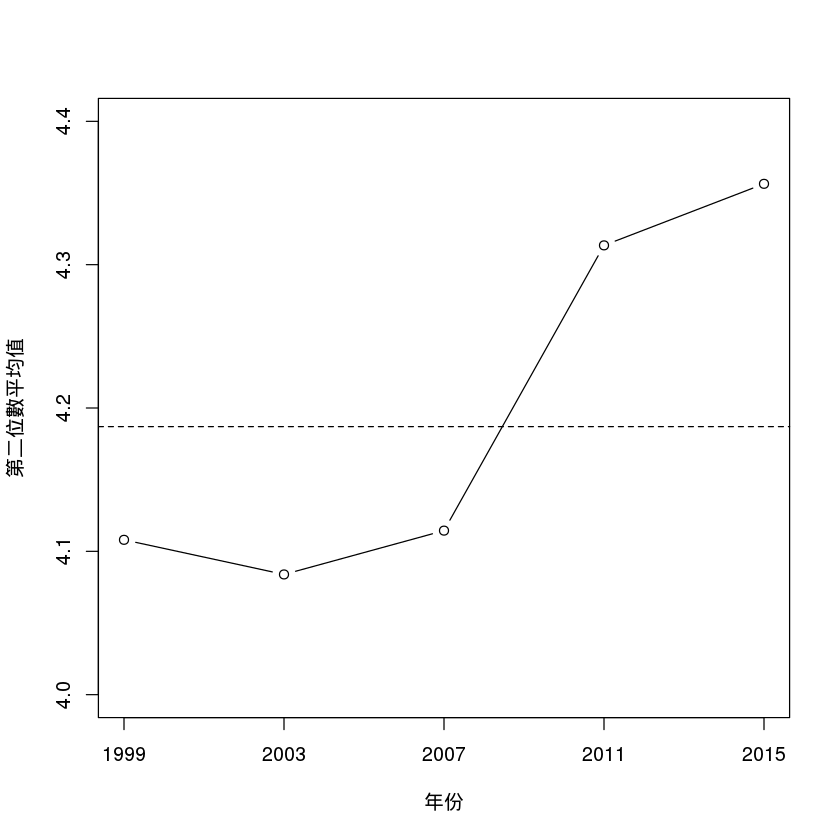

In [58]:
sapply(list(allcounts1999, allcounts2003, allcounts2007, allcounts2011, allcounts), function(x) (substr(x, 2, 2) %>% as.numeric %>% mean)) %>% plot(x = c(1999, 2003, 2007, 2011, 2015), y = ., ylim= c(4.0, 4.4), type = "b", xlab = "年份", ylab = "第二位數平均值", xaxt = "n")
axis(1, at=c(1999, 2003, 2007, 2011, 2015),labels=c(1999, 2003, 2007, 2011, 2015)) 
    abline(h=4.187, lty = 2)
